# ED Admission: Time Series Analysis #

In [1]:
# import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read cleaned train data:
df_cleaned = pd.read_csv('ED_train_cleaned.csv', index_col = 'Admission_Date', parse_dates = True)

# Remove unnamed column:
df_cleaned = df_cleaned.drop(['Unnamed: 0'], axis=1)

# Check dataframe info.:
df_cleaned.info()

# Check number of missing values:
df_cleaned.isnull().sum()

# Check drop duplicates: drop 288 rows
df_cleaned = df_cleaned.drop_duplicates()

# Filtered dataframe by Admit label: '0':non-admitted, '1':admitted #
###############################################################################
df_admit_0 = df_cleaned[df_cleaned['Admit'] == 0] # only ED non-admitted patients
df_admit_1 = df_cleaned[df_cleaned['Admit'] == 1] # only ED admitted patients

# Compute summary statistics #
###############################################################################
# ED admitted patients only:
df_admit_1_stat = df_admit_1.describe().T
# Reorder columns order in summary dataframe
df_admit_1_stat = df_admit_1_stat[['count','min','max','mean','25%','50%','75%','std']]
# Drop 'Admit' column:
df_admit_1_stat = df_admit_1_stat.drop(['Admit'])
# Print summary stat.:
df_admit_1_stat

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60672 entries, 2013-11-17 to 2011-11-05
Data columns (total 29 columns):
Gender                  60672 non-null object
Ethnicity               60672 non-null object
LIHN                    60672 non-null object
Avg_Income              60672 non-null float64
Distance                60672 non-null float64
GP_Visits               60672 non-null int64
ED_Visits               60672 non-null int64
Specialist_Visits       60672 non-null int64
Hospital_Admissions     60672 non-null int64
Total_Visits            60672 non-null int64
MRI_Count               60672 non-null int64
Referral_Diagnosis_1    60672 non-null object
Referral_Diagnosis_2    60672 non-null object
GP_Code                 60672 non-null object
Pain_Score              60672 non-null int64
Nausia_Score            60672 non-null int64
Allergy                 60672 non-null object
Previous_Medication     60672 non-null int64
Family_History          60672 non-null object
Symptom

,count,min,max,mean,25%,50%,75%,std
Avg_Income,2144.0,15058.000000,200001.000000,57192.554571,40159.500000,52212.000000,70900.750000,23116.862158
Distance,2144.0,2.198764,1154.751207,208.923002,96.672489,148.102940,183.546674,209.848983
GP_Visits,2144.0,0.000000,21.000000,5.642257,4.000000,5.000000,7.000000,2.628376
ED_Visits,2144.0,0.000000,5.000000,0.539646,0.000000,0.000000,1.000000,0.762707
Specialist_Visits,2144.0,0.000000,9.000000,0.610075,0.000000,0.000000,1.000000,0.868386
Hospital_Admissions,2144.0,0.000000,5.000000,0.103545,0.000000,0.000000,0.000000,0.369771
Total_Visits,2144.0,1.000000,28.000000,6.895522,5.000000,7.000000,9.000000,3.226885
MRI_Count,2144.0,0.000000,2.000000,0.273787,0.000000,0.000000,1.000000,0.478315
Pain_Score,2144.0,1.000000,5.000000,3.655784,2.000000,5.000000,5.000000,1.743459
Nausia_Score,2144.0,1.000000,4.000000,1.932369,2.000000,2.000000,2.000000,0.466914


## Time Series: ED admitted cases only ##
1st plot shows # of GP visits over admission date from 2009 to 2014.
2nd plot shows # of total visits over admission date from 2009 to 2014

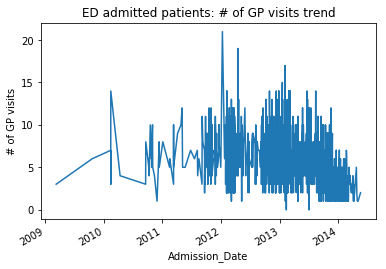

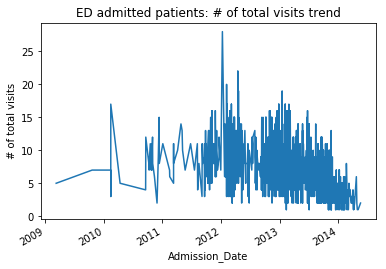

In [2]:
# Visualization: time series plot(s)
###############################################################################
# ED admitted patients #
# GP_Visits: 
df_admit_1['GP_Visits'].plot(title='ED admitted patients: # of GP visits trend')
plt.ylabel('# of GP visits')
plt.show()

# Total_Visits: 
df_admit_1['Total_Visits'].plot(title='ED admitted patients: # of total visits trend')
plt.ylabel('# of total visits')
plt.show()

## Time Series: ED non-admitted cases only ##
1st plot shows # of GP visits over admission date from 2007 to 2014.
2nd plot shows # of total visits over admission date from 2007 to 2014

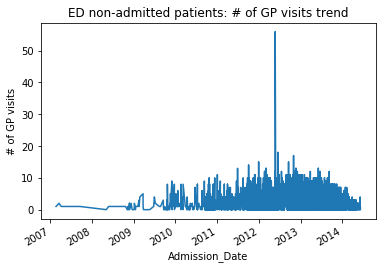

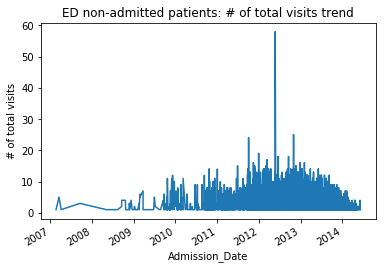

In [3]:
# ED non-admitted patients #
# GP_Visits: 
df_admit_0['GP_Visits'].plot(title='ED non-admitted patients: # of GP visits trend')
plt.ylabel('# of GP visits')
plt.show()

# Total_Visits: 
df_admit_0['Total_Visits'].plot(title='ED non-admitted patients: # of total visits trend')
plt.ylabel('# of total visits')
plt.show()

## Time Series with Resampling: ED admitted cases from day to month ##
In order to have a better visualization on ED admitted cases of patient trends, resampling was performed at different frequency from daily to monthly. 

Step 1: interploate missing admission date time point on data in between 2007 to 2014 resampled at daily.
Step 2: resample data point and aggregate by mean over month of data points from 2007 to 2014.

In [4]:
##############
# Resampling #
##############
# Separate numerical columns:
cols_num = ['Avg_Income', 'Distance', 'GP_Visits','ED_Visits', 'Specialist_Visits',
            'Hospital_Admissions', 'Total_Visits', 'MRI_Count', 'Pain_Score', 
            'Nausia_Score', 'Previous_Medication', 'Symptom2Visit_Days', 
            'Test_B', 'Test_C', 'Test_D', 'Test_E', 'Test_H']

# Resampling on 17 columns: day
df_day_admit_1 = df_admit_1.loc[:,cols_num].resample('D').first().interpolate('linear')
df_day_admit_1.isnull().sum()

# Resampling from imputed day --> month frequency by aggregated mean value:
df_month_admit_1 = df_day_admit_1.loc[:,cols_num].resample('M').mean()
df_month_admit_1.isnull().sum()

Avg_Income             0
Distance               0
GP_Visits              0
ED_Visits              0
Specialist_Visits      0
Hospital_Admissions    0
Total_Visits           0
MRI_Count              0
Pain_Score             0
Nausia_Score           0
Previous_Medication    0
Symptom2Visit_Days     0
Test_B                 0
Test_C                 0
Test_D                 0
Test_E                 0
Test_H                 0
dtype: int64

### ED admitted cases: mean of GP visits and symptom to visit days over admission time ###

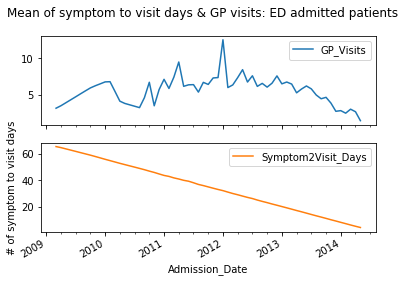

In [5]:
# Time-series plot:  
df_month_admit_1[['GP_Visits','Symptom2Visit_Days']].plot(subplots=True, title='Mean of symptom to visit days & GP visits: ED admitted patients')
plt.ylabel('# of symptom to visit days')
plt.show()

In [6]:
### ED admitted cases: mean of GP visits and total visits over admission time ###

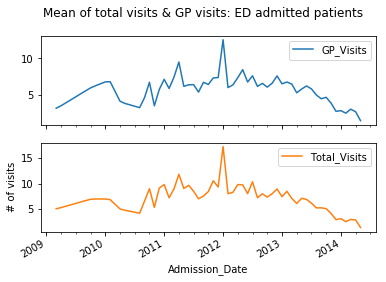

In [7]:
# Time-series plot:  
df_month_admit_1[['GP_Visits','Total_Visits']].plot(subplots=True, title='Mean of total visits & GP visits: ED admitted patients')
plt.ylabel('# of visits')
plt.show()

### ED admitted cases: mean of GP visits and ED visits over admission time ###

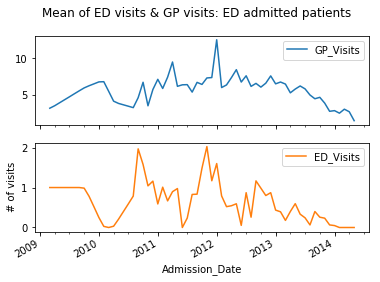

In [8]:
# Time-series plot:  
df_month_admit_1[['GP_Visits','ED_Visits']].plot(subplots=True, title='Mean of ED visits & GP visits: ED admitted patients')
plt.ylabel('# of visits')
plt.show()

### ED admitted cases: mean of GP visits and average income over admission time ###

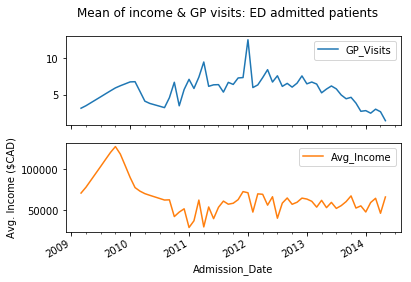

In [9]:
# Time-series plot: 
df_month_admit_1[['GP_Visits','Avg_Income']].plot(subplots=True, title='Mean of income & GP visits: ED admitted patients')
plt.ylabel('Avg. Income ($CAD)')
plt.show()

### ED admitted cases: mean of GP visits and distance over admission time ###

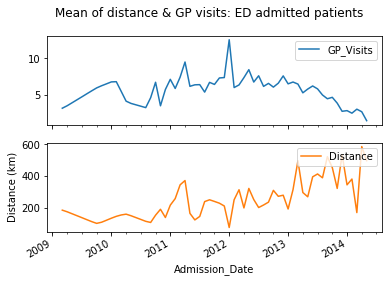

In [10]:
# Time-series plot: 
df_month_admit_1[['GP_Visits','Distance']].plot(subplots=True, title='Mean of distance & GP visits: ED admitted patients')
plt.ylabel('Distance (km)')
plt.legend(loc='upper right')
plt.show()

### ED admitted cases: mean of GP visits and pain score over admission time ###

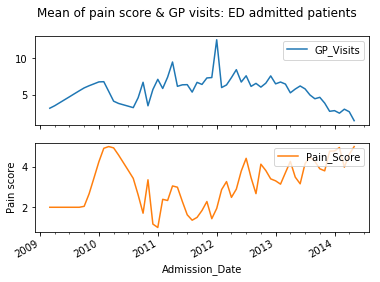

In [11]:
# Time-series plot: 
df_month_admit_1[['GP_Visits','Pain_Score']].plot(subplots=True, title='Mean of pain score & GP visits: ED admitted patients')
plt.ylabel('Pain score')
plt.legend(loc='upper right')
plt.show()

### ED admitted cases: mean of GP visits and nausia score over admission time ###

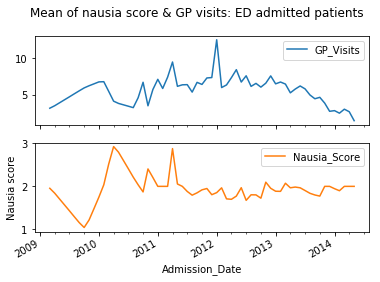

In [12]:
# Time-series plot: 
df_month_admit_1[['GP_Visits','Nausia_Score']].plot(subplots=True, title='Mean of nausia score & GP visits: ED admitted patients')
plt.ylabel('Nausia score')
plt.show()

### ED admitted cases: mean of GP visits and medications taken over admission time ###

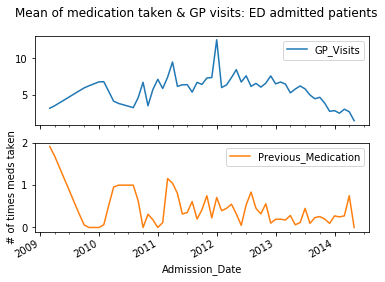

In [13]:
# Time-series plot: 
df_month_admit_1[['GP_Visits','Previous_Medication']].plot(subplots=True, title='Mean of medication taken & GP visits: ED admitted patients')
plt.ylabel('# of times meds taken')
plt.show()

### ED admitted cases: mean of GP visits and hospital admissions over admission time ###

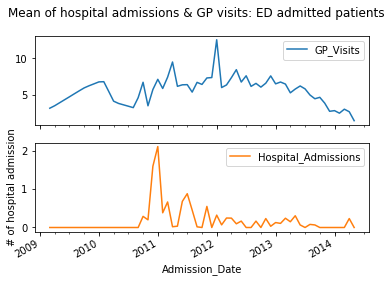

In [14]:
# Time-series plot: 
df_month_admit_1[['GP_Visits','Hospital_Admissions']].plot(subplots=True, title='Mean of hospital admissions & GP visits: ED admitted patients')
plt.ylabel('# of hospital admission')
plt.show()